In [87]:
import datetime

# Get the current date and time
current_time = datetime.datetime.now()

# Print the current date and time
print("Timestamp:", current_time)

Timestamp: 2024-03-21 11:08:39.054559


In [2]:
# pip install ipykernal
# pip install pandas
# pip install numpy
#pip install matplotlib  
#pip install seaborn
#pip install statsmodels
# pip install scikit-learn
# pip install openpyxl

# Pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=sns.load_dataset("titanic")

In [5]:
df.rename(columns={"sex":"gender"},inplace=True)

In [6]:
df.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
df.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [83]:
df=df[["sepal_length", "petal_width","sepal_width","petal_length"]]

In [65]:
df.head()

,sepal_length,petal_width,sepal_width,petal_length
0,5.1,0.2,3.5,1.4
1,4.9,0.2,3.0,1.4
2,4.7,0.2,3.2,1.3
3,4.6,0.2,3.1,1.5
4,5.0,0.2,3.6,1.4


In [84]:
corr=df.corr() # for normal distribution
corr

,sepal_length,petal_width,sepal_width,petal_length
sepal_length,1.000000,0.817941,-0.117570,0.871754
petal_width,0.817941,1.000000,-0.366126,0.962865
sepal_width,-0.117570,-0.366126,1.000000,-0.428440
petal_length,0.871754,0.962865,-0.428440,1.000000


<Axes: >

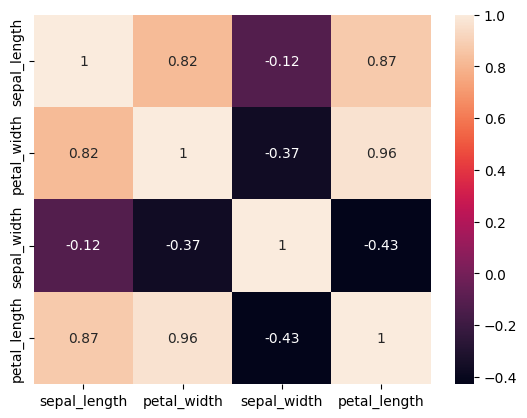

In [86]:
sns.heatmap(corr,annot=True)

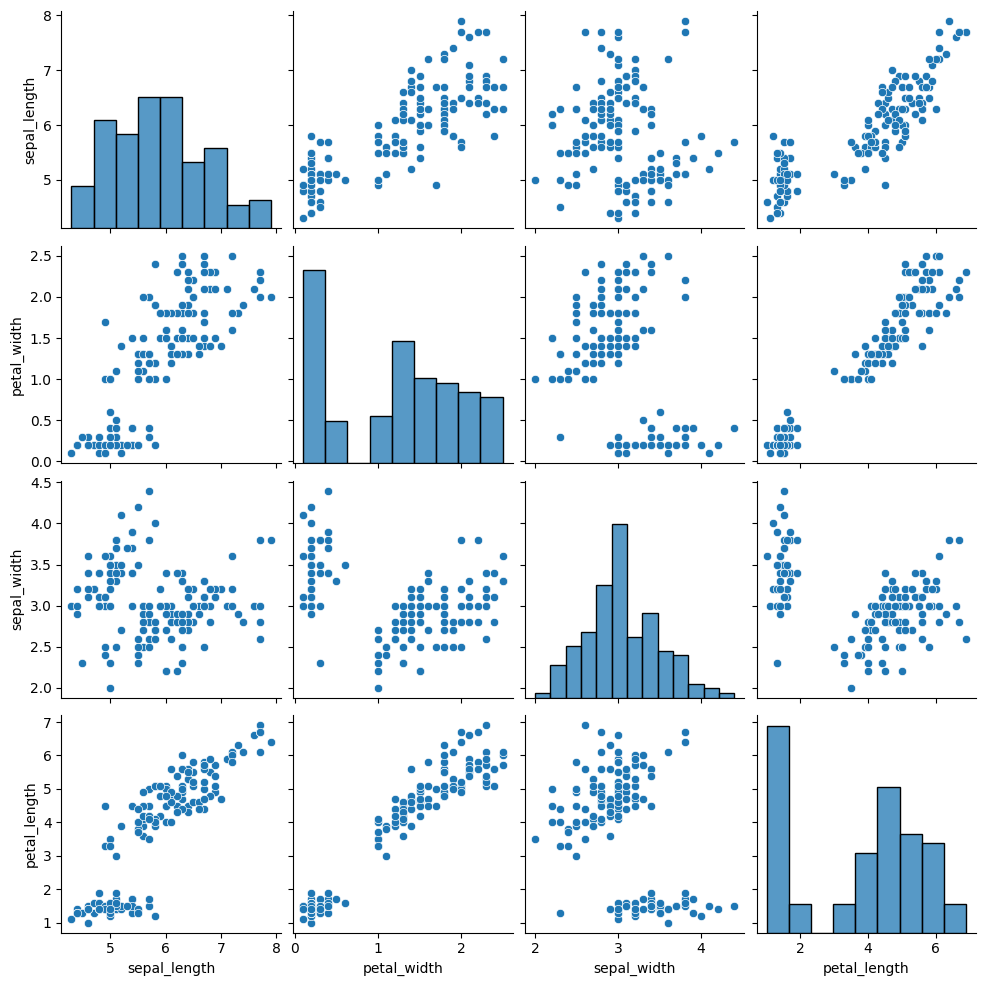

In [33]:
sns.pairplot(df)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

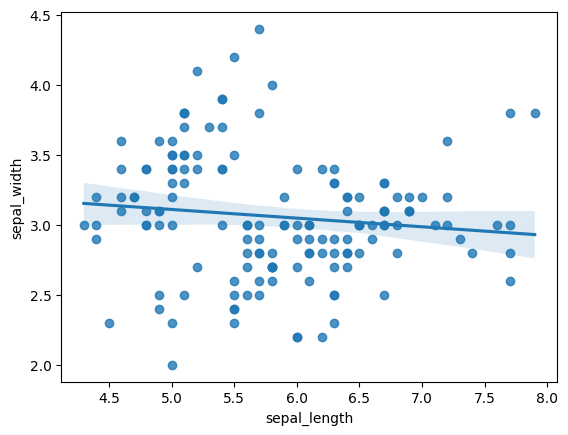

In [69]:
sns.regplot(x="sepal_length",y="sepal_width",data=df)

# Lab session 1

Use dataset of penguins to find the correlation between the columns and to draw the regression plot for each variable as well as heatmap and pairplot

# Lab session 2

To perform exploratory data analysis using data of penguins to find different trends and patterns in the data

# Lab session 3

To perform the EDA on --------------- to find the different patterns and trends in the given dataset

In [71]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
df.shape

(891, 15)

In [73]:
df.rename(columns={"sex": "gender"},inplace=True)
df.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   gender       891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [79]:
# arragange missing values in ascending order
df.isnull().sum().sort_values(ascending=False)



deck           688
embark_town      2
survived         0
pclass           0
gender           0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [75]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [76]:
df["age"]=df["age"].fillna(df["age"].mean())

In [78]:
df["embarked"]=df["embarked"].fillna(df["embarked"].mode())[0]

<Axes: xlabel='age', ylabel='Count'>

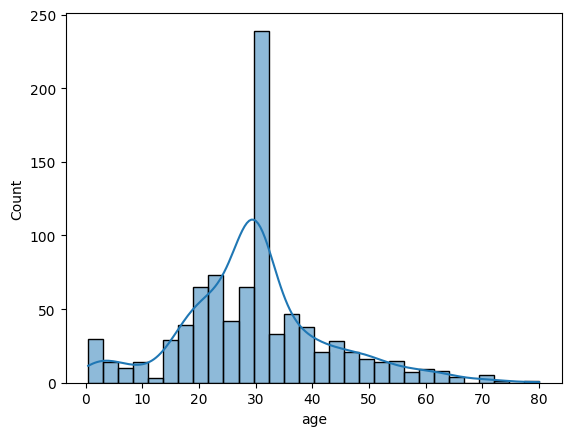

In [55]:
sns.histplot(df["age"],kde=True)

# pip install pandas_profiling

In [ ]:
pip install pydantic

In [58]:
import pandas_profiling as pp

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.5/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.5/u/import-error